# Case Study on Loss Given Default

# Context: 
    
CNB Bank deals in all kinds of car loans. Customer first apply for loan after that company validates the customer 
eligibility for loan. In case the borrower doesn’t pay back the loan, the losses are to be incurred by the bank.
LGD stands for Loss given default so it means when a customer at a bank defaults on his loan how much money does the bank lose. 
The customer might have paid some amount back or no amount at all.The bank wants to know if the amount the bank loses can be 
predicted for new customers who apply for a loan from the past data of all defaulters and their pending amounts

# Problem:

The bank wants to automate the loss estimation based on customer detail provided while applying for loan. These details are Age, 
Years of Experience, Number of cars, Gender, Marital Status. To automate this process, they have given a problem to identify the 
loss estimation given that the customers is a defaulter, those are eligible for loan amount so that they get to know what 
features are leading to defaults up to which amount. Here are the details about the data set.

Data:

Variable - Description <br>
Ac_No - The account of customer used as identifier <br>
Age - Age of borrower (16-70) <br>
Years of Experience -  Working experience (0-53) <br>
Number of Cars - Possessed cars (1, 2, 3, 4) <br>
Gender - Male/Female <br>
Married - Married/Single <br>
Loss in Thousands - Target variable <br>


In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In [2]:
# read the csv file into a dataframe
df=pd.read_csv("LGD.csv")

In [3]:
# lets do a basic EDA ( exploratory data analysis) on the file
df.info() # this tells us 15290 rows & 7 columns
#df.shape will also give the same info
#df.info also tells us there are no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [4]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [135]:
df.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,389.859718
std,28947.841061,18.280511,17.850707,0.953776,253.729433
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,3500.000000


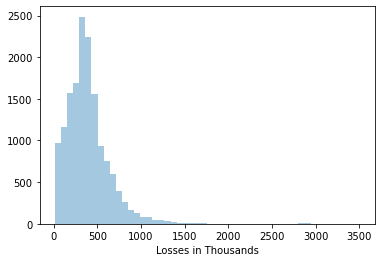

In [5]:
#to plot histograms
sns.distplot(df['Losses in Thousands'],kde=False,bins=50)

In [8]:
# # this probably means we shud take the log to normalize the data
# sns.distplot((df['Losses in Thousands']),kde=False,bins=50)
# # map function is used to apply any function on each element of a series/list
# # now the distribution looks normal

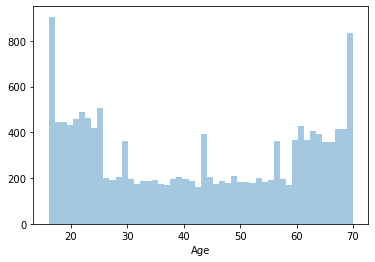

In [9]:
sns.distplot(df['Age'],kde=False,bins=50)

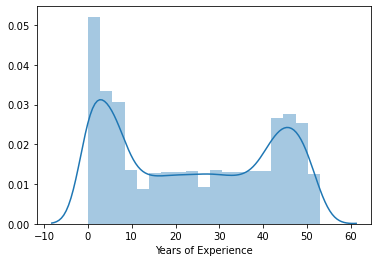

In [10]:
sns.distplot(df['Years of Experience'])

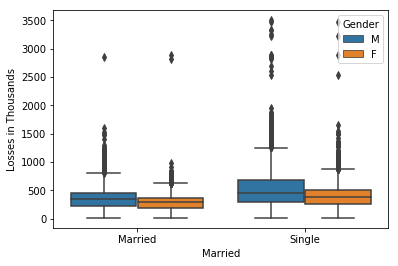

In [ ]:
sns.boxplot(x="Married",y="Losses in Thousands",data=df,hue="Gender")
#this shows that sinle ppl & Male are the worst

In [11]:
df.corr()
# we see a high co-relation between Age and Years of Experience 
# which is obvious as with Age your Experience increases

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


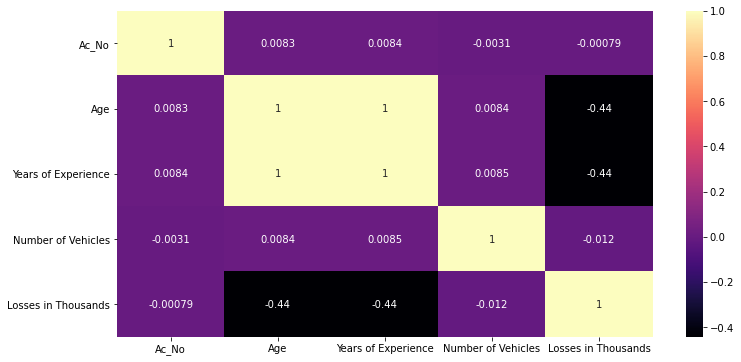

In [14]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),cmap='magma',annot=True)

In [15]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [95]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
cat_cols

['Gender', 'Married']

In [96]:
cat_data = df[cat_cols]
cat_data.head()

,Gender,Married
0,M,Married
1,F,Single
2,M,Married
3,F,Married
4,M,Single


## pd.get dummies way

In [136]:
pd.get_dummies(cat_data).head()

,Gender_F,Gender_M,Married_Married,Married_Single
0,0,1,1,0
1,1,0,0,1
2,0,1,1,0
3,1,0,1,0
4,0,1,0,1


In [97]:
dummy_vars = pd.get_dummies(cat_data,drop_first=True)
dummy_vars.head()

,Gender_M,Married_Single
0,1,0
1,0,1
2,1,0
3,0,0
4,1,1


## One hot encoding way

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

https://www.youtube.com/watch?v=NYtwyvyvDEk

In [117]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(cat_data).toarray()
feature_arr

array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.],
       ...,
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [118]:
feature_labels = ohe.categories_
feature_labels

[array(['F', 'M'], dtype=object), array(['Married', 'Single'], dtype=object)]

In [119]:
feature_labels = np.array(feature_labels).ravel()
feature_labels

array(['F', 'M', 'Married', 'Single'], dtype=object)

In [120]:
features = pd.DataFrame(feature_arr, columns=feature_labels)
features

,F,M,Married,Single
0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
15285,1.0,0.0,0.0,1.0
15286,1.0,0.0,1.0,0.0
15287,1.0,0.0,1.0,0.0
15288,0.0,1.0,1.0,0.0


Here we drop the category whichever we want

In [121]:
# first lets build a simple model with all variables and as is

# we will have to convert the string variables to dummy variables 
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)

#simillarly for married
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
dummy_var2.head()

# merge the above 2 dataframe with the original dataframe df
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [122]:
#now we no longer need Married and gender Columns. We will use their
#dummies instead
df_new2 = df_new.drop(['Gender','Married'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [125]:
#decide your regressor and predictor variables
x = df_new2[["Age","Number of Vehicles","M","Single"]]
y = df_new2["Losses in Thousands"]

In [128]:
print("x shape",x.shape)
print("y shape",y.shape)

x shape (15290, 4)
y shape (15290,)


In [127]:
#split the data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (10703, 4)
x_test shape (4587, 4)
y_train shape (10703,)
y_test shape (4587,)


# Sklearn way

In [129]:
from sklearn.linear_model import LinearRegression # import the functions

In [130]:
lm = LinearRegression() #call the function

In [131]:
lm.fit(x_train,y_train) # fit the model

print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas

539.6565230110674
[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]


In [132]:
#see the error parameters
from sklearn import metrics

In [133]:
#make prediction
pred = lm.predict(x_test)
print(metrics.mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(y_test,pred))
print(metrics.mean_squared_log_error(y_test,pred))

148.50819212153985
45262.36761675603
0.3916318653529019


In [137]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.29505257544943864